In [50]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.io
import matplotlib.pyplot as plt

# Load the dataset
dataset = scipy.io.loadmat('./train_32x32.mat')

In [51]:
# reshaping data to required format
print('X dimensions before:', dataset['X'].shape)
print('y dimensions before:', dataset['y'].shape)
x_data = dataset['X'].transpose((3,0,1,2)).reshape((73257,32*32*3))
y_data = dataset['y'].flatten()          
print('X dimensions after:',x_data.shape)
print('y dimensions after:',y_data.shape)

# print(y_data.min(), y_data.max())    # note: y values range from 1 to 10



X dimensions before: (32, 32, 3, 73257)
y dimensions before: (73257, 1)
X dimensions after: (73257, 3072)
y dimensions after: (73257,)


In [52]:
# random 2500 samples from dataset where dataset['y'] = 0 to 9
random_samples = np.empty((0,3072))

for i in range(0,10):
    temp = x_data[y_data%10 == i]
    random_indices = np.random.choice(temp.shape[0], 2500)
    random_samples = np.append(random_samples,temp[random_indices],axis=0)
    # print(random_samples.shape)

ten_samples = np.array([random_samples[i] for i in range(0,24999,2500)])
np.random.seed(42)
np.random.shuffle(random_samples)

In [53]:
# Create a PCA object and fit it to the standardized data
pca = PCA()
pca.fit(random_samples)

PCA()

In [54]:
# Transform the data to its principal components
pca_data = pca.transform(random_samples)
print(pca_data.shape)

(25000, 3072)


In [55]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_

Number of components required for a variance ratio of at least 0.9 is 27
Proportion of Variance for 27 components is 0.9026152148739155


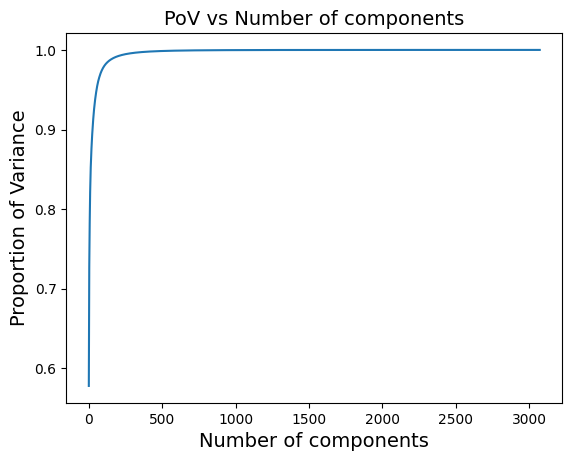

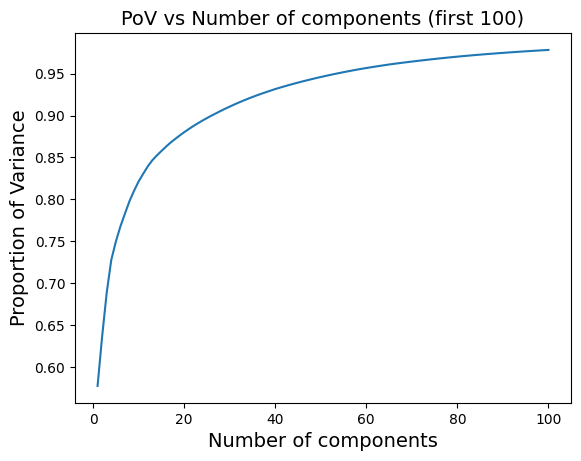

In [56]:
# Plotting Proportion of Variance (PoV) against the number of eigenvectors

# cumulative sum of eigenvalues
cumulative_pov = np.cumsum(var_ratio)
num_eigen = 0
for i in range(0,len(cumulative_pov)):
    if cumulative_pov[i] >= 0.9:
        print('Number of components required for a variance ratio of at least 0.9 is', i+1)
        print('Proportion of Variance for {} components is {}'.format(i+1,cumulative_pov[i]))
        num_eigen = i+1
        break

# print(cumulative_pov[25])       # required 26 eigenvec
plt.plot(range(1,len(cumulative_pov) + 1), cumulative_pov)
plt.title('PoV vs Number of components',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

plt.plot(range(1,101), cumulative_pov[:100])
plt.title('PoV vs Number of components (first 100)',fontsize=14)
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('Proportion of Variance',fontsize=14)
plt.show()

In [57]:
# STEPS
# TODO: get 10 samples DONE
# TODO: transform to pca
# TODO: plot and print values along first 10 eigenvectors




1
(10, 3072)
[[ 3.58466901e+03 -1.53165119e+03  4.12455061e+02 ...  1.23712733e-01
  -3.18461321e-01  1.89016129e-01]
 [ 1.69405246e+02 -4.52550391e+00 -1.42438696e+02 ...  9.29528449e-02
   1.07493679e-01  5.66491746e-03]
 [ 4.24641831e+02  1.18796034e+02  1.23888989e+02 ...  2.98022903e-01
   2.79640106e-02 -2.77192280e-01]
 ...
 [-3.38221309e+02  3.07551301e+01 -3.79748412e+01 ... -4.78211072e-01
  -9.23984772e-02 -2.51071112e-02]
 [-1.71570732e+03 -2.28122841e+02  5.42075490e+02 ... -5.07965390e-01
  -1.60913611e-03 -5.51583170e-02]
 [ 5.78386421e+03 -4.17439851e+01 -9.36840283e+01 ... -2.01177409e-01
   2.10810259e-01  1.66069723e-02]]
Sample for digit 0


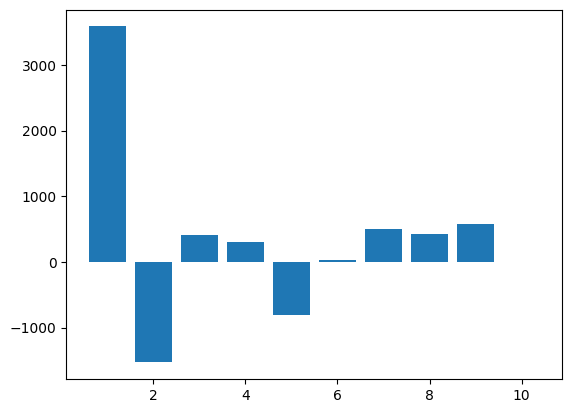

Sample for digit 1


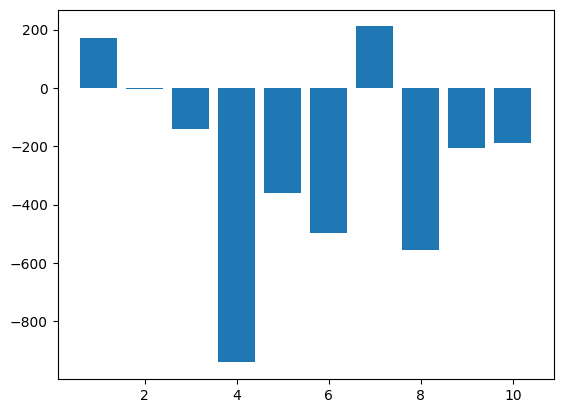

Sample for digit 2


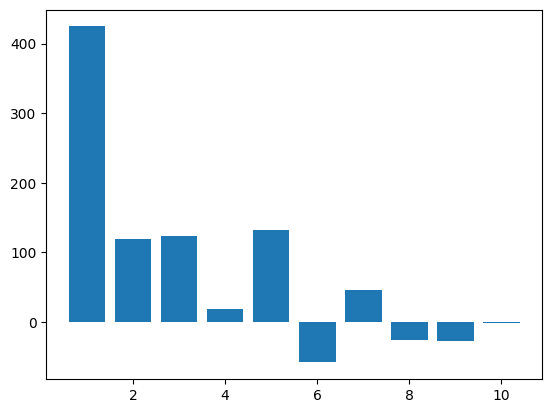

Sample for digit 3


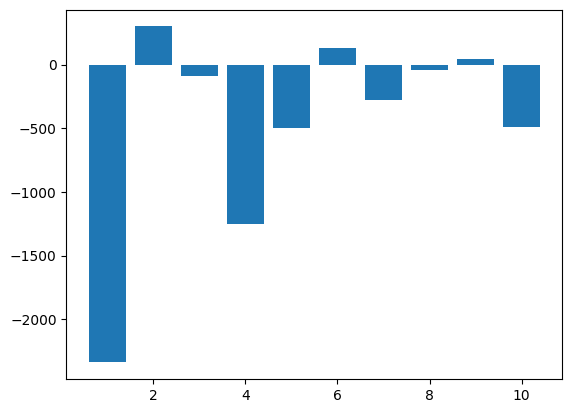

Sample for digit 4


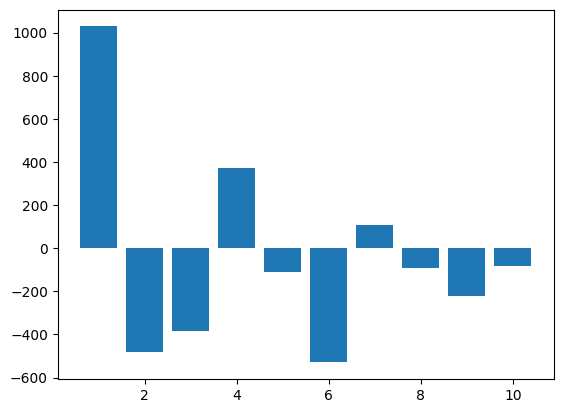

Sample for digit 5


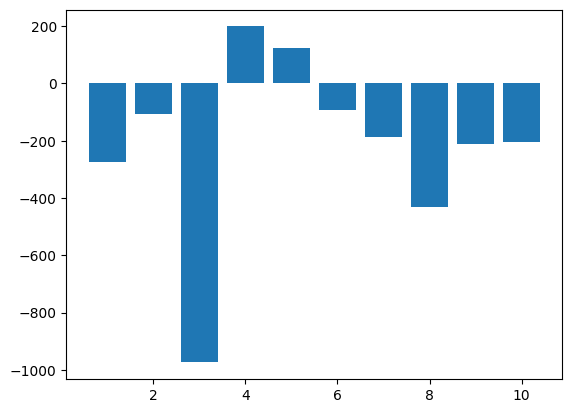

Sample for digit 6


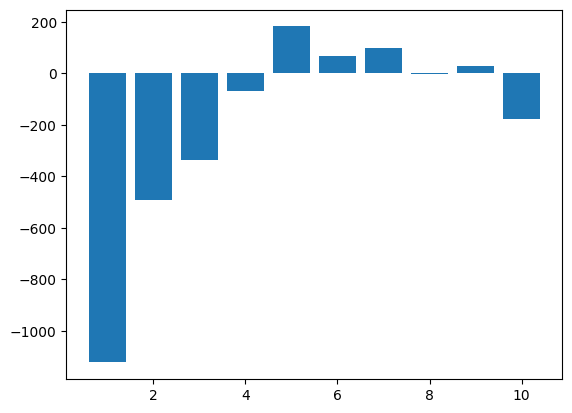

Sample for digit 7


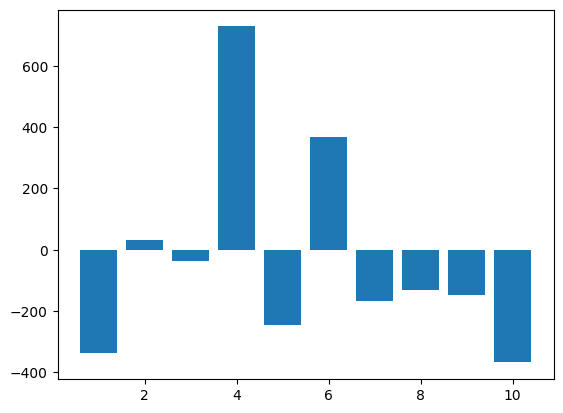

Sample for digit 8


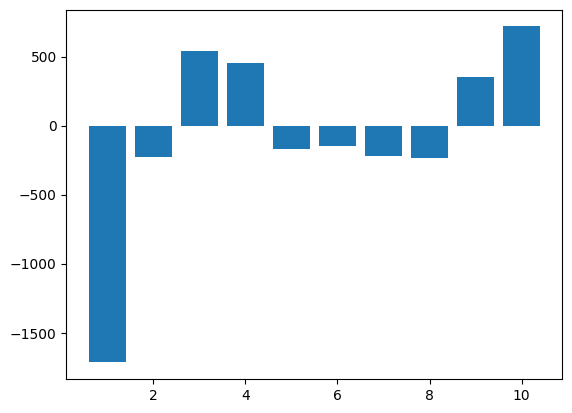

Sample for digit 9


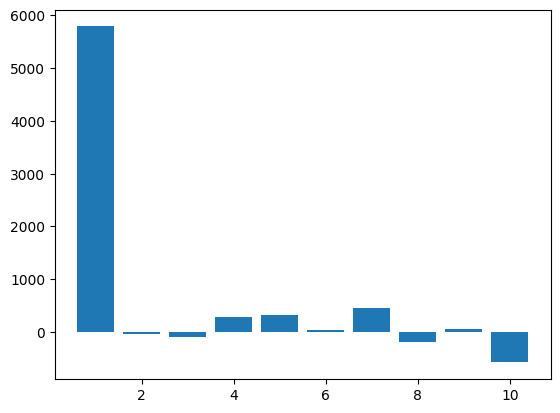

In [58]:
# make a transform matrix for pca using only top 26 eigenvectors

# transform_matrix = eigenvectors[:num_eigen]
# trans_samples2 = np.matmul(ten_samples,transform_matrix.T)
trans_samples = pca.transform(ten_samples)


print('1')
print(trans_samples.shape)
print(trans_samples)
# print('2')
# print(trans_samples2.shape)
# print(trans_samples2)

for i in range(0,10):
    print('Sample for digit', i)
    sample_i = trans_samples[i][:10]
    plt.bar(range(1,11), sample_i)
    plt.show()



In [59]:
new_transformed_data = trans_samples
for i in range(0,len(new_transformed_data)):
    new_transformed_data[i][11:] = 0

ten_samples_reconstructed = pca.inverse_transform(new_transformed_data)

print(ten_samples_reconstructed.shape)
print(new_transformed_data)
print(ten_samples_reconstructed)

(10, 3072)
[[ 3.58466901e+03 -1.53165119e+03  4.12455061e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.69405246e+02 -4.52550391e+00 -1.42438696e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.24641831e+02  1.18796034e+02  1.23888989e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.38221309e+02  3.07551301e+01 -3.79748412e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.71570732e+03 -2.28122841e+02  5.42075490e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.78386421e+03 -4.17439851e+01 -9.36840283e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[184.04389012 199.16140646 208.48065453 ... 214.73454813 234.55301338
  249.29187884]
 [120.67551881 126.48074237 133.32790181 ... 119.09580591 124.70944527
  131.48687679]
 [124.06081916 122.87139306 125.61794543 ... 122.76243561 121.8183489
  125.33534576]
 ...
 [ 90.49331096  94.17903076 107.73502348 ... 112.28712926 116.58722893
  124.37994762]
 

[179. 191. 226. ... 201. 202. 220.]


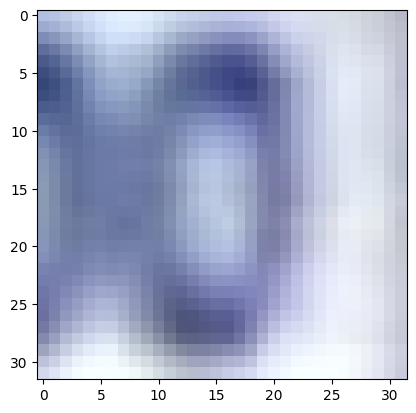

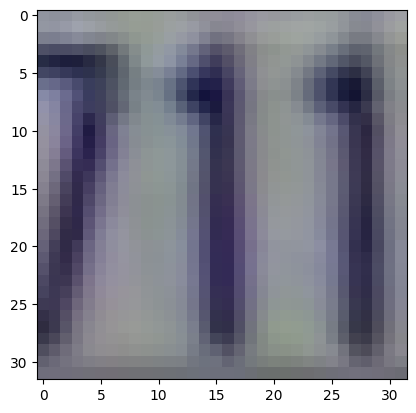

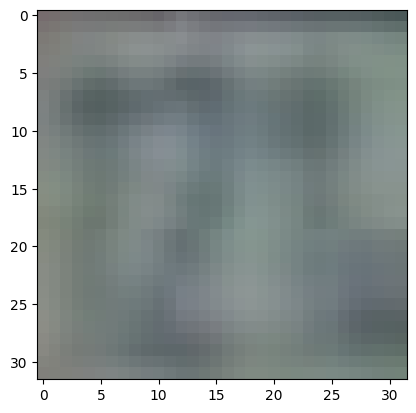

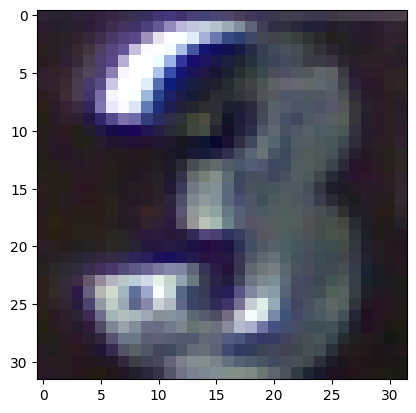

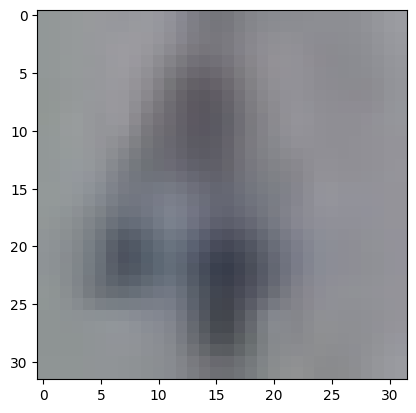

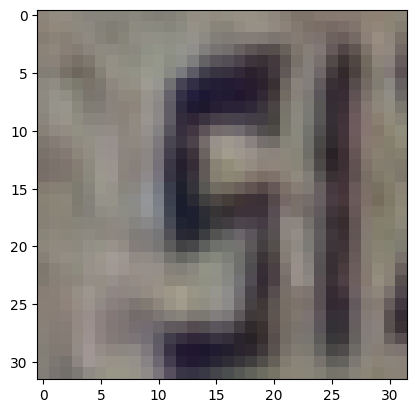

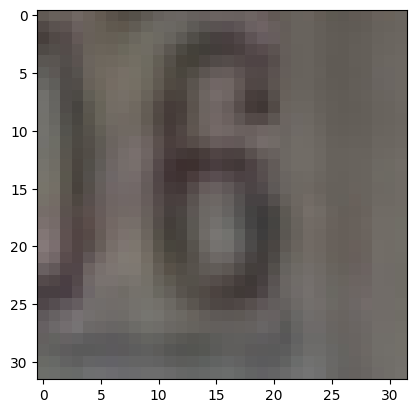

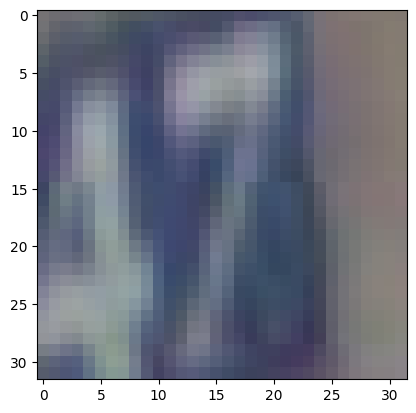

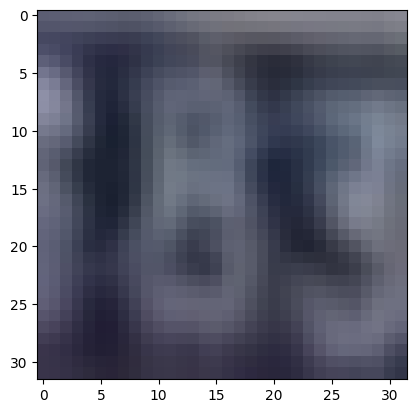

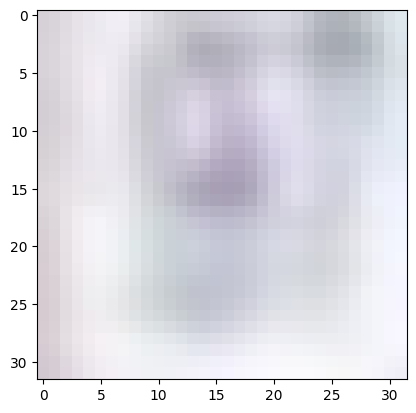

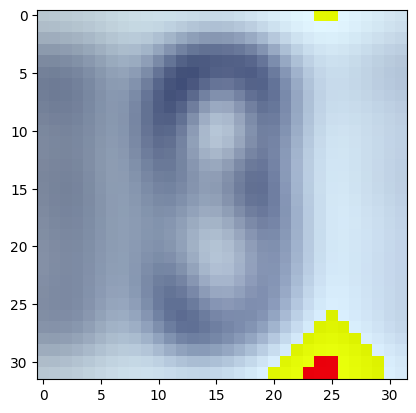

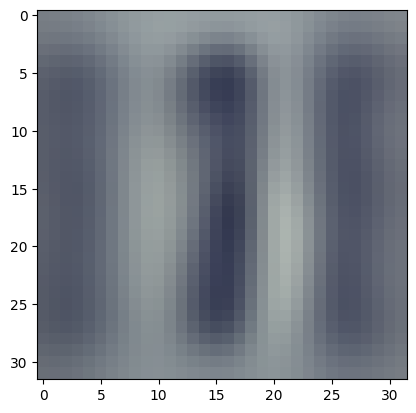

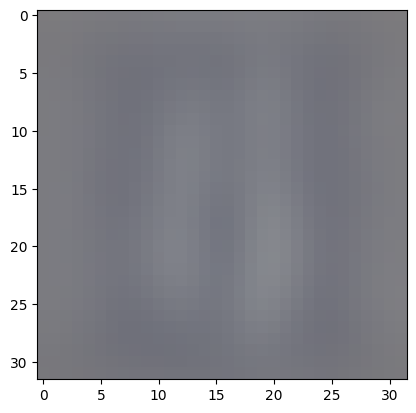

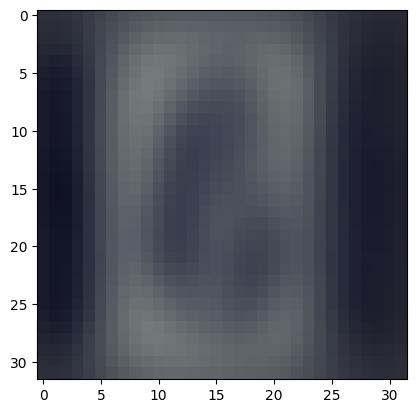

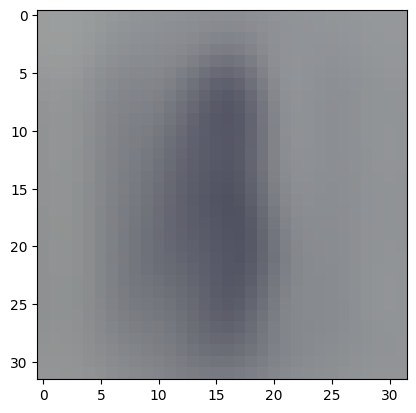

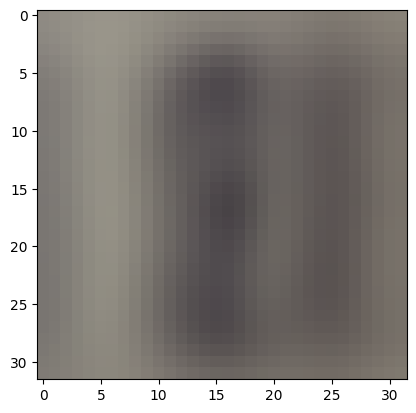

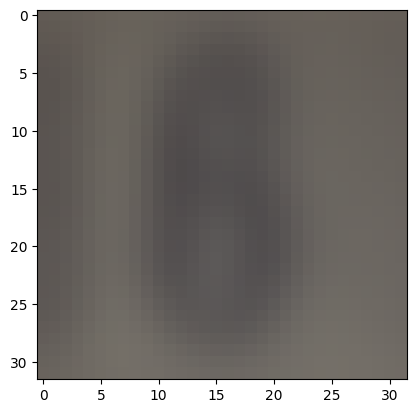

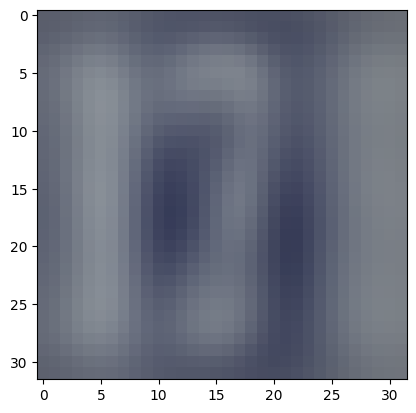

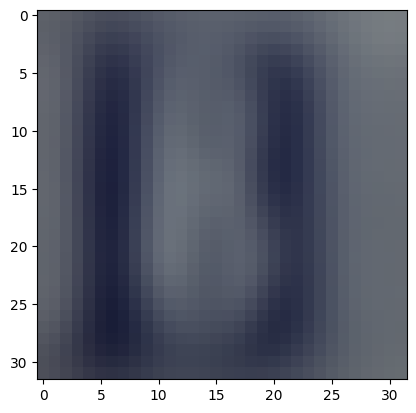

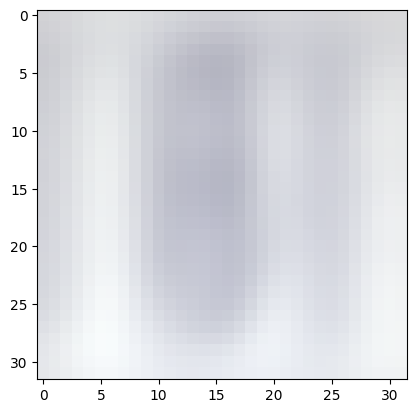

In [60]:
print(ten_samples[0])
def features_to_image(features):
    features = features.astype('uint8').reshape((32,32,3))
    plt.figure()
    plt.imshow(features)
    # plt.imshow(features_reconstructed)

# features_to_image(ten_samples[1])

# for i in range(0,10):
    # features_to_image(ten_samples[i])
for i in range(0,len(ten_samples)):
    features_to_image(ten_samples[i])

for i in range(0,len(ten_samples)):
    features_to_image(ten_samples_reconstructed[i])
# features_to_image(ten_samples_reconstructed[0])



# plot 2d image rgb
# plt.imshow(ten_samples[0].astype('uint8').reshape((32,32,3)))# 